In [39]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
%matplotlib inline

# Read and join data sets

In [4]:
module_dir = os.getcwd() + '/dataset/'
sys.path.append(module_dir)
print(f'Adding into sys.path: {module_dir}')

Adding into sys.path: /Users/yuconghu/OneDrive - nyu.edu/interview-task/dataset/


In [7]:
products_0 = pd.read_csv(module_dir+'products-data-0.tsv', sep='\t', names = ["id", "category", "title"])
products_1 = pd.read_csv(module_dir+'products-data-1.tsv', sep='\t', names = ["id", "category", "title"])
products_2 = pd.read_csv(module_dir+'products-data-2.tsv', sep='\t', names = ["id", "category", "title"])
products_3 = pd.read_csv(module_dir+'products-data-3.tsv', sep='\t', names = ["id", "category", "title"])

reviews_0 = pd.read_csv(module_dir+'reviews-0.tsv', sep='\t', names = ['id', 'rating', 'review'])
reviews_1 = pd.read_csv(module_dir+'reviews-1.tsv', sep='\t', names = ['id', 'rating', 'review'])
reviews_2 = pd.read_csv(module_dir+'reviews-2.tsv', sep='\t', names = ['id', 'rating', 'review'])
reviews_3 = pd.read_csv(module_dir+'reviews-3.tsv', sep='\t', names = ['id', 'rating', 'review'])

In [14]:
# check first 5 rows of dataset
products_0.head()

,id,category,title
0,daa54754-af9c-41c0-b542-fe5eabc5919c,Kitchen,Bodum Travel Press 12-Ounce French Press Coffe...
1,ab602aca-9bad-4aa9-bd42-6ce24cdf8680,Kitchen,RH Forschner by Victorinox BladeSafe for Knife...
2,f98cd8d3-d6fe-4ee3-8c9f-a18c1690f7a6,Kitchen,Bellemain 12-Cup Nonstick Madeleine Pan
3,396f73e3-e3ef-4c93-a4b7-e8b04c6a2223,Jewelry,8mm Heat Treated Agate Beads Tibetan Buddhist ...
4,329ed5e3-8b47-4e78-961b-18b89e7da808,Jewelry,2.50 Ct Oval Black Onyx 925 Sterling Silver Pe...


In [23]:
reviews_0.head()

,id,rating,review
0,daa54754-af9c-41c0-b542-fe5eabc5919c,5,Great!
1,ab602aca-9bad-4aa9-bd42-6ce24cdf8680,5,It fit perfectly on my new<br />Victorinox Fib...
2,f98cd8d3-d6fe-4ee3-8c9f-a18c1690f7a6,5,Excellent pan - my daughter just made madelein...
3,396f73e3-e3ef-4c93-a4b7-e8b04c6a2223,3,not the good one but not bad
4,329ed5e3-8b47-4e78-961b-18b89e7da808,1,This is a rip off. It only comes with this nec...


In [19]:
# join dataset by rows
products = pd.concat([products_0, products_1, products_2, products_3])
reviews = pd.concat([reviews_0, reviews_1, reviews_2, reviews_3])

In [58]:
# join dataset by columns
data = pd.merge(products, reviews, on='id')
len(data)

1254

Code the target variable to be numeric: use the value `1` to represent 'Kitchen' and `0` to represent 'Jewelry'.

In [59]:
dummy = (data.iloc[:,1]=='Kitchen')*1
dummy
df = pd.concat([data.drop(columns=['category']),dummy],1)
df.head()

,id,title,rating,review,category
0,daa54754-af9c-41c0-b542-fe5eabc5919c,Bodum Travel Press 12-Ounce French Press Coffe...,5,Great!,1
1,ab602aca-9bad-4aa9-bd42-6ce24cdf8680,RH Forschner by Victorinox BladeSafe for Knife...,5,It fit perfectly on my new<br />Victorinox Fib...,1
2,f98cd8d3-d6fe-4ee3-8c9f-a18c1690f7a6,Bellemain 12-Cup Nonstick Madeleine Pan,5,Excellent pan - my daughter just made madelein...,1
3,396f73e3-e3ef-4c93-a4b7-e8b04c6a2223,8mm Heat Treated Agate Beads Tibetan Buddhist ...,3,not the good one but not bad,0
4,329ed5e3-8b47-4e78-961b-18b89e7da808,2.50 Ct Oval Black Onyx 925 Sterling Silver Pe...,1,This is a rip off. It only comes with this nec...,0


### Join title and review column into a new column called 'text' for text tokenization

In [65]:
df["text"] = df["title"].map(str) + df["review"]

In [66]:
df.head()

,id,title,rating,review,category,text
0,daa54754-af9c-41c0-b542-fe5eabc5919c,Bodum Travel Press 12-Ounce French Press Coffe...,5,Great!,1,Bodum Travel Press 12-Ounce French Press Coffe...
1,ab602aca-9bad-4aa9-bd42-6ce24cdf8680,RH Forschner by Victorinox BladeSafe for Knife...,5,It fit perfectly on my new<br />Victorinox Fib...,1,RH Forschner by Victorinox BladeSafe for Knife...
2,f98cd8d3-d6fe-4ee3-8c9f-a18c1690f7a6,Bellemain 12-Cup Nonstick Madeleine Pan,5,Excellent pan - my daughter just made madelein...,1,Bellemain 12-Cup Nonstick Madeleine PanExcelle...
3,396f73e3-e3ef-4c93-a4b7-e8b04c6a2223,8mm Heat Treated Agate Beads Tibetan Buddhist ...,3,not the good one but not bad,0,8mm Heat Treated Agate Beads Tibetan Buddhist ...
4,329ed5e3-8b47-4e78-961b-18b89e7da808,2.50 Ct Oval Black Onyx 925 Sterling Silver Pe...,1,This is a rip off. It only comes with this nec...,0,2.50 Ct Oval Black Onyx 925 Sterling Silver Pe...


In [80]:
# Split train test data

from sklearn.model_selection import train_test_split

X = df['text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get summary statistics
Get summary stats of the total df, and check for null values if necessary

In [61]:
df.describe()

,category
count,1254.000000
mean,0.409091
std,0.491862
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [62]:
for col in df.columns:
    print(col, " : ", sum(df[col].isnull()))

id  :  0
title  :  0
rating  :  0
review  :  0
category  :  0


# Modelling
Use two ways of vectorization: count-based and TF-IDF
Use three algorithms for binary classification:
    - Logistic regression
    - Bernoulli naive bayes
    - Support vector machine

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# from nltk.tokenize import RegexpTokenizer

# tokenizer = RegexpTokenizer(r'\w+')
# tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

# vectorize 

tfidfvectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,2), binary=True)
tfidf_corpus = tfidfvectorizer.fit([''.join(x) for x in X_train.values.tolist()])
X_tfidf_train = tfidf_corpus.transform([''.join(x) for x in X_train.values.tolist()])
X_tfidf_test = tfidf_corpus.transform([''.join(x) for x in X_test.values.tolist()])

countvectorizer = CountVectorizer(stop_words='english', ngram_range = (1,2), binary=True)
count_corpus = countvectorizer.fit([''.join(x) for x in X_train.values.tolist()])
X_count_train = count_corpus.transform([''.join(x) for x in X_train.values.tolist()])
X_count_test = count_corpus.transform([''.join(x) for x in X_test.values.tolist()])

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn import metrics

# logistic regression
logiclf_count = LogisticRegression()
logiclf_count.fit(X_count_train, y_train)
logiclf_count_score = logiclf_count.score(X_count_test, y_test)
print('Accuracy of logistic regression classifier using count vectorizer on test set: {:.2f}'.format(logiclf_count_score))
print("Area under the ROC curve on the test data = %.3f" % metrics.roc_auc_score(y_test, logiclf_count.predict_proba(X_count_test)[:,1]))

logiclf_tf = LogisticRegression()
logiclf_tf.fit(X_tfidf_train, y_train)
logiclf_tf_score = logiclf_tf.score(X_tfidf_test, y_test)
print('Accuracy of logistic regression classifier using tfidf vectorizer on test set: {:.2f}'.format(logiclf_tf_score))
print("Area under the ROC curve on the test data = %.3f" % metrics.roc_auc_score(y_test, logiclf_tf.predict_proba(X_tfidf_test)[:,1]))

# bernoulli NB
bernoclf_count = BernoulliNB()
bernoclf_count.fit(X_count_train, y_train)
bernoclf_count_score = bernoclf_count.score(X_count_test, y_test)
print('Accuracy of Bernoulli classifier using count vectorizer on test set: {:.2f}'.format(bernoclf_count_score))
print("Area under the ROC curve on the test data = %.3f" % metrics.roc_auc_score(y_test, bernoclf_count.predict_proba(X_count_test)[:,1]))

bernoclf_tf = BernoulliNB()
bernoclf_tf.fit(X_tfidf_train, y_train)
bernoclf_tf_score = bernoclf_tf.score(X_tfidf_test, y_test)
print('Accuracy of Bernoulli classifier using tfidf vectorizer on test set: {:.2f}'.format(bernoclf_tf_score))
print("Area under the ROC curve on the test data = %.3f" % metrics.roc_auc_score(y_test, bernoclf_tf.predict_proba(X_tfidf_test)[:,1]))

# SVM
SVC_count = SVC(probability=True)
SVC_count.fit(X_count_train, y_train)
SVC_count_score = SVC_count.score(X_count_test, y_test)
print('Accuracy of Bernoulli classifier using count vectorizer on test set: {:.2f}'.format(SVC_count_score))
print("Area under the ROC curve on the test data = %.3f" % metrics.roc_auc_score(y_test, SVC_count.predict_proba(X_count_test)[:,1]))

SVC_tf = SVC(probability=True)
SVC_tf.fit(X_tfidf_train, y_train)
SVC_tf_score = SVC_tf.score(X_tfidf_test, y_test)
print('Accuracy of Bernoulli classifier using tfidf vectorizer on test set: {:.2f}'.format(bernoclf_tf_score))
print("Area under the ROC curve on the test data = %.3f" % metrics.roc_auc_score(y_test, SVC_tf.predict_proba(X_tfidf_test)[:,1]))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of logistic regression classifier using count vectorizer on test set: 0.86
Area under the ROC curve on the test data = 0.914
Accuracy of logistic regression classifier using tfidf vectorizer on test set: 0.82
Area under the ROC curve on the test data = 0.910
Accuracy of Bernoulli classifier using count vectorizer on test set: 0.61
Area under the ROC curve on the test data = 0.908
Accuracy of Bernoulli classifier using tfidf vectorizer on test set: 0.61
Area under the ROC curve on the test data = 0.908
Accuracy of Bernoulli classifier using count vectorizer on test set: 0.56
Area under the ROC curve on the test data = 0.903


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Bernoulli classifier using tfidf vectorizer on test set: 0.61
Area under the ROC curve on the test data = 0.913


## Plot: false positive v. false negative

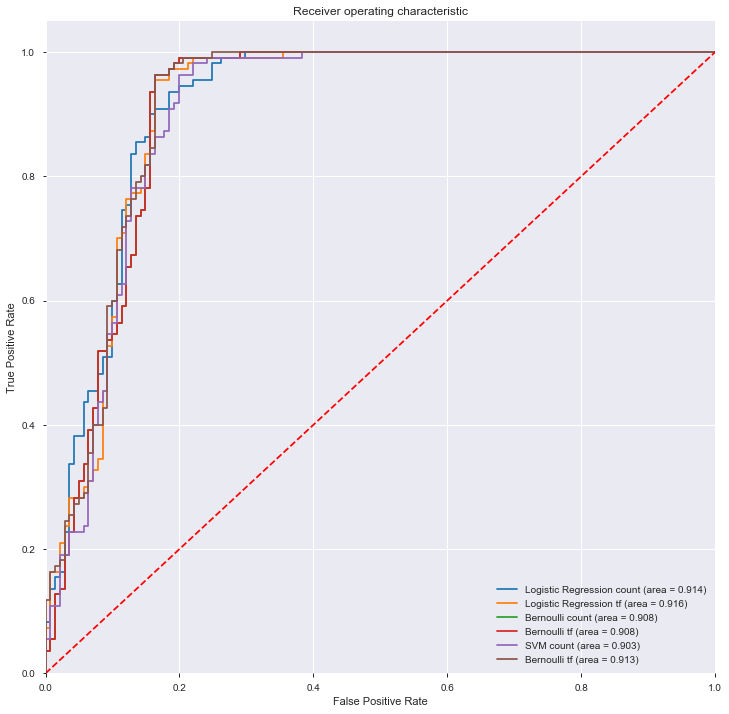

In [83]:
# Calculate AUC score
logi_count = metrics.roc_auc_score(y_test, logiclf_count.predict_proba(X_count_test)[:,1])
logi_tf = metrics.roc_auc_score(y_test, logiclf_count.predict_proba(X_tfidf_test)[:,1])
berno_count = metrics.roc_auc_score( y_test, bernoclf_count.predict_proba(X_count_test)[:,1])
berno_tf = metrics.roc_auc_score( y_test, bernoclf_count.predict_proba(X_tfidf_test)[:,1])
svm_count = metrics.roc_auc_score(y_test, SVC_count.predict_proba(X_count_test)[:,1])
svm_tf = metrics.roc_auc_score(y_test, SVC_tf.predict_proba(X_tfidf_test)[:,1])

# Logistic regression 
fpr_logit_count, tpr_logit_count, thresholds_logi_count = metrics.roc_curve(y_test, logiclf_count.predict_proba(X_count_test)[:,1])
fpr_logit_tf, tpr_logit_tf, thresholds_logi_tf = metrics.roc_curve(y_test, logiclf_tf.predict_proba(X_tfidf_test)[:,1])

# Bernoulli 
fpr_berno_count, tpr_berno_count, thresholds_berno_count = metrics.roc_curve(y_test, bernoclf_count.predict_proba(X_count_test)[:,1])
fpr_berno_tf, tpr_berno_tf, thresholds_berno_tf = metrics.roc_curve(y_test, bernoclf_tf.predict_proba(X_tfidf_test)[:,1])

# SVM
fpr_svm_count, tpr_svm_count, thresholds_svm_count = metrics.roc_curve(y_test, SVC_count.predict_proba(X_count_test)[:,1])
fpr_svm_tf, tpr_svm_tf, thresholds_svm_tf = metrics.roc_curve(y_test, SVC_tf.predict_proba(X_tfidf_test)[:,1])

# Plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

plt.figure()
plt.plot(fpr_logit_count, tpr_logit_count, label='Logistic Regression count (area = %0.3f)' % logi_count)
plt.plot(fpr_logit_tf, tpr_logit_tf, label='Logistic Regression tf (area = %0.3f)' % logi_tf)
plt.plot(fpr_berno_count, tpr_berno_count, label='Bernoulli count (area = %0.3f)' % berno_count)
plt.plot(fpr_berno_tf, tpr_berno_tf, label='Bernoulli tf (area = %0.3f)' % berno_tf)
plt.plot(fpr_svm_count, tpr_svm_count, label='SVM count (area = %0.3f)' % svm_count)
plt.plot(fpr_svm_tf, tpr_svm_tf, label='Bernoulli tf (area = %0.3f)' % svm_tf)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Gridsearch cross-validation

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

kf = KFold(n_splits=5, random_state=66)
kf.get_n_splits(X)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_tfidf_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_tfidf_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.299 (+/-0.001) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.299 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.299 (+/-0.001) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.299 (+/-0.001) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.400 (+/-0.401) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.299 (+/-0.001) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.848 (+/-0.038) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.400 (+/-0.401) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.865 (+/-0.037) for {'C': 1, 'kernel': 'linear'}
0.848 (+/-0.038) for {'C': 10, 'kernel': 'linear'}
0.848 (+/-0.038) for {'C': 100, 'kernel': 'linear'}
0.848 (+/-0.038) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    

In [87]:
# Set the parameters by cross-validation
tuned_parameters = [{'penalty': ['l1', 'l2'],
                     'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_count_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_count_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best parameters set found on development set:

{'C': 1, 'penalty': 'l2'}

Grid scores on development set:

0.840 (+/-0.039) for {'C': 1, 'penalty': 'l1'}
0.858 (+/-0.042) for {'C': 1, 'penalty': 'l2'}
0.812 (+/-0.026) for {'C': 10, 'penalty': 'l1'}
0.857 (+/-0.040) for {'C': 10, 'penalty': 'l2'}
0.813 (+/-0.028) for {'C': 100, 'penalty': 'l1'}
0.853 (+/-0.043) for {'C': 100, 'penalty': 'l2'}
0.830 (+/-0.052) for {'C': 1000, 'penalty': 'l1'}
0.852 (+/-0.047) for {'C': 1000, 'penalty': 'l2'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       141
           1       0.82      0.89      0.85       110

   micro avg       0.86      0.86      0.86       251
   macro avg       0.86      0.87      0.86       251
weighted avg       0.87      0.86      0.86       251


# Tuning hyper-parameters for recall



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best parameters set found on development set:

{'C': 1, 'penalty': 'l2'}

Grid scores on development set:

0.850 (+/-0.042) for {'C': 1, 'penalty': 'l1'}
0.866 (+/-0.046) for {'C': 1, 'penalty': 'l2'}
0.821 (+/-0.018) for {'C': 10, 'penalty': 'l1'}
0.866 (+/-0.041) for {'C': 10, 'penalty': 'l2'}
0.819 (+/-0.024) for {'C': 100, 'penalty': 'l1'}
0.861 (+/-0.045) for {'C': 100, 'penalty': 'l2'}
0.850 (+/-0.061) for {'C': 1000, 'penalty': 'l1'}
0.860 (+/-0.051) for {'C': 1000, 'penalty': 'l2'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       141
           1       0.82      0.89      0.85       110

   micro avg       0.86      0.86      0.86       251
   macro avg       0.86      0.87      0.86       251
weighted avg       0.87      0.86      0.86       251




### Best model has a precision of 0.87 and recall of 0.86

# Check misclassification

In [91]:
diff = logiclf_count.predict(X_count_test) - y_test
diff = diff[diff == -1]

pd.set_option('display.max_colwidth', -1)
for i in diff.index[0:3]:
    print(X_test.loc[i])
    print('\n')

Breville USA BEM600XL Handy Stand MixerExcellent. Thank you


Most Popular Glittering Silver Round Wedding Cake Stand 18" for Multi-layer CakeBeautiful


Lillian Rose True Love Cupcake Wraps, White, Set of 12Nice addition to the candy bar. Everyone loved the design. Super cute!


